In [1]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.integrate as integrate
import scipy.special as special
from scipy.signal import find_peaks
import pandas as pd
import h5py
import time
import tqdm
from typing import List, Tuple, Sequence

import os
os.chdir(os.getcwd())

#### System parameters

In [2]:
N = 15       # number of loops
lc = 0.1     # magnetic core length / m
l = 7e-2
w = 18e-6 * 4
ur = 70000
u0 = 4* np.pi * 1e-7
u = ur * u0
Ac = l * w   # cross-sectional area / m2
fre = 4      # degauss frequency
T = 30       # deguass time
gain = 20

In [3]:
data =  pd.read_csv("1Vpp2Hz-0002off.csv")
mea_time = np.array(data.Time)
dt = (mea_time[-1] - mea_time[0])/len(mea_time)
N_data  = int((T - 1/fre)/dt)
Vin = np.array(data.ChannelA)
Vpick = np.array(data.ChannelB)
peaks,_ = find_peaks(Vpick,distance=500,height= max(Vpick)*0.99)
print(peaks)

[554]


In [4]:
time_uesd = mea_time[peaks[0]:peaks[0] + N_data]
Vin_used  = Vin[peaks[0]:peaks[0] + N_data]
I = Vin_used * 6
H = np.array(I) * N / lc
Vpick_used = Vpick[peaks[0]:peaks[0] + N_data]

Text(0.5, 1.0, 'degauss wave and pickup voltage')

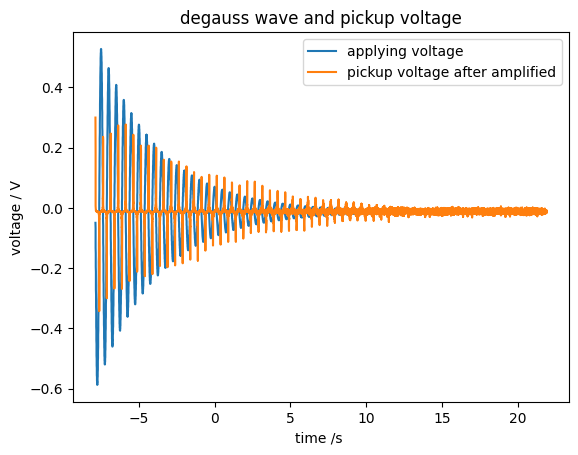

In [24]:
plt.plot(time_uesd,I, label = "applying voltage" )
plt.plot(time_uesd,Vpick_used, label = "pickup voltage after amplified")
plt.legend()
plt.xlabel("time /s ")
plt.ylabel("voltage / V")
plt.title("degauss wave and pickup voltage")

In [6]:
B = []
B_int = []
Bini = [0]
dB = -1 * np.array(Vpick_used)/Ac/N/gain
print(np.mean(dB[-1000:-1]))
for a in dB:
        Bini.append(Bini[-1] + (a-np.mean(dB[-2000:-1]))* dt )
B.append(Bini[1:])
print(max(B[0])-min(B[0])/2)

8.170980305702527
1.4876677167515253


Text(0.5, 1.0, 'H_off = -1.9 A/m ')

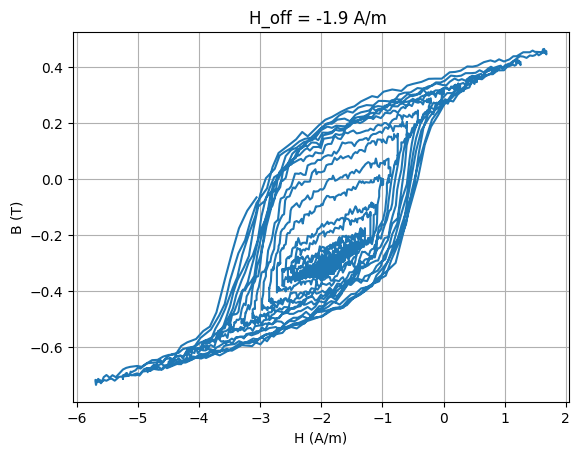

In [31]:
plt.plot(H[-6000:-1],B[0][-6000:-1]-(max(B[0])+min(B[0]))/2,"-")
plt.grid(True)
plt.xlabel("H (A/m)")
plt.ylabel("B (T)")
plt.title("H_off = -1.9 A/m ")

Text(0.5, 1.0, 'H_off = -1.9 A/m ')

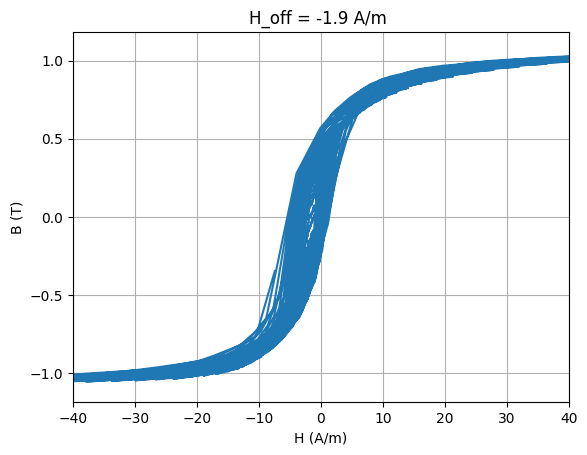

In [30]:
plt.plot(H,B[0]-(max(B[0])+min(B[0]))/2,"-")
plt.grid(True)
plt.xlim([-40,40])
plt.xlabel("H (A/m)")
plt.ylabel("B (T)")
plt.title("H_off = -1.9 A/m ")
# plt.plot(Vin_used[-1],B[0][-1]-(max(B[0])-min(B[0]))/2,"o",color = "r")

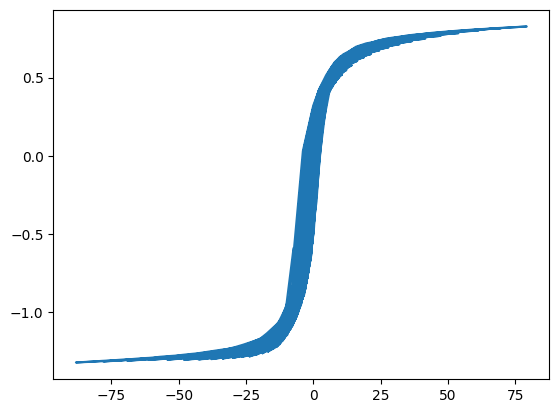

In [9]:
plt.plot(H,B[0],"-")

In [11]:
u = []
offs = [-0.002,0]
H_settle = np.array(offs) * 6  * N / lc
B_settle = [-0.33,0.69]
u.append((B_settle[1]-B_settle[0])/(H_settle[1]-H_settle[0])/u0)
print(u)

[450939.00542703684]
